# Libraries:

In [3]:
#import mysql.connector as sql
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pad 
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Exploring the database:

In [4]:
df = pd.read_csv('xxxx.csv', header=0, delimiter=';', decimal=',')

print("Column names:", df.columns)

number_of_men = df[df['gender'] == 'M'].shape[0]
print("Number of men:", number_of_men)
number_of_women = df[df['gender'] == 'F'].shape[0]
print("Number of women:", number_of_women)

print(df.iloc[:, 1:].head())

Column names: Index(['id', 'surgery', 'OMS', 'survival', 'IDH', 'ATRK', 'gender'], dtype='object')
Number of men: 101
Number of women: 75
      surgery  OMS  survival  IDH ATRK gender
0  incomplete    0       213  NaN  NaN      F
1      biopsy    2       307  NaN  NaN      M
2      biopsy    2       207  NaN  NaN      F
3  incomplete    1       493  NaN  NaN      F
4  incomplete    1       768  NaN  NaN      M


In [5]:
def ExplorationDataPreliminaries_diagram(df, colonne): 

    df['surgery'] = df['surgery'].replace({'incomplete': 'incomplete surgery', 'complete': 'complete surgery'})

    custom_palette = ["#00244A", "#006A89", "#37B4AA"]
    df_women = df[df['gender'] == 'F']
    df_men = df[df['gender'] == 'M']  
    
    data = (df[colonne].value_counts() * 100) / len(df)
    data_women = (df_women[colonne].value_counts() * 100) / len(df_women)
    data_men = (df_men[colonne].value_counts() * 100) / len(df_men)

    fig, axs = plt.subplots(1, 3, figsize=(20, 10)) 

    axs[0].pie(x=data, labels=data.index, colors=custom_palette[:len(data)], autopct='%1.2f%%', textprops={'color': 'black'})
    axs[0].set_title(f"Overall distribution ({colonne})", color='black')

    axs[1].pie(x=data_women, labels=data_women.index, colors=custom_palette[:len(data_women)], autopct='%1.2f%%', textprops={'color': 'black'})
    axs[1].set_title(f"Women’s distribution ({colonne})", color='black')

    axs[2].pie(x=data_men, labels=data_men.index, colors=custom_palette[:len(data_men)], autopct='%1.2f%%', textprops={'color': 'black'})
    axs[2].set_title(f"Men’s distribution ({colonne})", color='black')

    for ax in axs:
        for txt in ax.texts:
            if '%' in txt.get_text():
                txt.set_color('white')
    
    plt.tight_layout()
    plt.show()

    fig.savefig(f'{colonne}_diagramme.png')


In [6]:
def ExplorationDataPreliminaries_histplot_boxplot(df, colonne):

    df['surgery'] = df['surgery'].replace({'incomplete': 'incomplete surgery', 'complete': 'complete surgery'})

    custom_palette = ["#00244A", "#006A89", "#37B4AA"]
    
    df_women = df[df['gender'] == 'F']
    df_men = df[df['gender'] == 'M']

    print(f"Minimum value of {colonne} :", round(df[colonne].min(), 2))
    print(f"Maximum value of {colonne} :", round(df[colonne].max(), 2))
    print(f"Average value of {colonne} :", round(df[colonne].mean(), 2))
    print(f"Standard deviation value of {colonne} :", round(df[colonne].std(), 2))
        
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))  

    sns.histplot(data=df, x=colonne, kde=False, ax=axs[0, 0], color=custom_palette[0]) 
    axs[0, 0].set_title(f'Global ({colonne})')
    sns.histplot(data=df_women, x=colonne, kde=False, ax=axs[0, 1], color=custom_palette[1]) 
    axs[0, 1].set_title(f'Women ({colonne})')
    sns.histplot(data=df_men, x=colonne, kde=False, ax=axs[0, 2], color=custom_palette[2]) 
    axs[0, 2].set_title(f'Men ({colonne})')

    sns.boxplot(data=df, x=colonne, ax=axs[1, 0], color=custom_palette[0])
    sns.stripplot(data=df, x=colonne, dodge=True, ax=axs[1, 0], color="black", jitter=True)
    axs[1, 0].set_title(f'Global ({colonne})')
    sns.boxplot(data=df_women, x=colonne, ax=axs[1, 1], color=custom_palette[1])
    sns.stripplot(data=df_women, x=colonne, dodge=True, ax=axs[1, 1], color="black", jitter=True)
    axs[1, 1].set_title(f'Women ({colonne})')
    sns.boxplot(data=df_men, x=colonne, ax=axs[1, 2], color=custom_palette[2])
    sns.stripplot(data=df_men, x=colonne, dodge=True, ax=axs[1, 2], color="black", jitter=True)
    axs[1, 2].set_title(f'Men ({colonne})')
        
    plt.tight_layout()
    plt.show()  
    
    fig.savefig(f'{colonne}_histo_boxplot.png')


In [7]:
def perform_anova_analysis(df, variable):
    surgery_groups = [
        df[df['surgery'] == 'biopsy'][variable].dropna(),
        df[df['surgery'] == 'incomplete'][variable].dropna(),
        df[df['surgery'] == 'complete'][variable].dropna()
    ]

    f_statistic, p_value = f_oneway(*surgery_groups)

    print(f"ANOVA - Comparison of {variable} by surgery type:")
    print(f"F-statistic: {f_statistic}")
    print(f"p-value: {p_value}")
    
    print("\nDescriptive statistics:")
    for surgery_type in ['biopsy', 'incomplete', 'complete']:
        group = df[df['surgery'] == surgery_type][variable].dropna()
        print(f"\n{surgery_type.capitalize()}:")
        print(f"Number of patients: {len(group)}")
        print(f"Mean {variable}: {group.mean():.2f}")
        print(f"Standard deviation {variable}: {group.std():.2f}")

    if variable == 'survival':
        plt.figure(figsize=(10, 6))

        df['surgery_type'] = df['surgery'].replace({'incomplete': 'incomplete surgery', 'complete': 'complete surgery'})
        
        order = ['biopsy', 'incomplete surgery', 'complete surgery']
        
        summary_df = (
            df.groupby('surgery_type')[variable]
            .agg(['mean', 'std'])
            .reindex(order)
            .reset_index()
        )

        colors = ['#00244A', '#006A89', '#37B4AA']

        sns.barplot(x='surgery_type', y='mean', data=summary_df, errorbar=None, order=order, palette=colors)

        for i, (mean, std) in enumerate(zip(summary_df['mean'], summary_df['std'])):
            lower_error = mean - std
            upper_error = mean + std

            if lower_error < 0:
                lower_error = 0  
            if upper_error > mean:
                plt.plot([i, i], [mean, upper_error], color='black', linewidth=1)
                plt.plot([i - 0.1, i + 0.1], [upper_error, upper_error], color='black', linewidth=1)
            
            if summary_df['surgery_type'].iloc[i] in ['incomplete surgery', 'complete surgery']:
                plt.text(i, upper_error - 10, '*', color='black', fontsize=20, ha='center')
        
        plt.figtext(0.5, -0.1, "Impact of surgery quality on overall survival: Mean ± SD, n=70 ; 62 ; 44 for biopsy, surgery incomplete, surgery complete respectively, * p < 0.05 vs biopsy'.", ha="center", va="top", fontsize=9)
        plt.subplots_adjust(bottom=-0.02, top=0.8)
        plt.xlabel('')
        plt.ylabel(f'{variable} (days)')
        plt.savefig('survival_distribution_by_surgery_type.png', bbox_inches='tight', dpi=150)
        plt.show()


# Reusltats

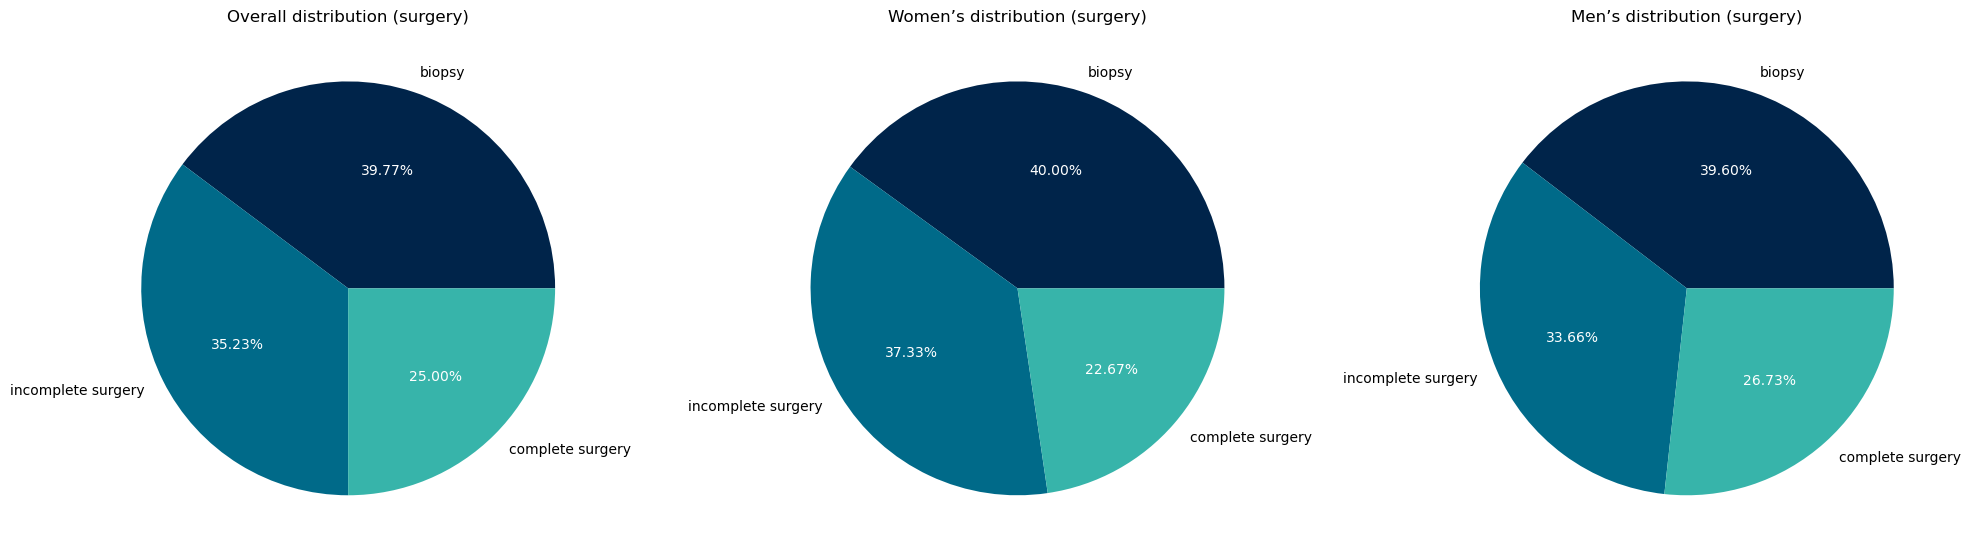

In [8]:
ExplorationDataPreliminaries_diagram(df, 'surgery')

Minimum value of survival : 23
Maximum value of survival : 1600
Average value of survival : 355.25
Standard deviation value of survival : 261.59


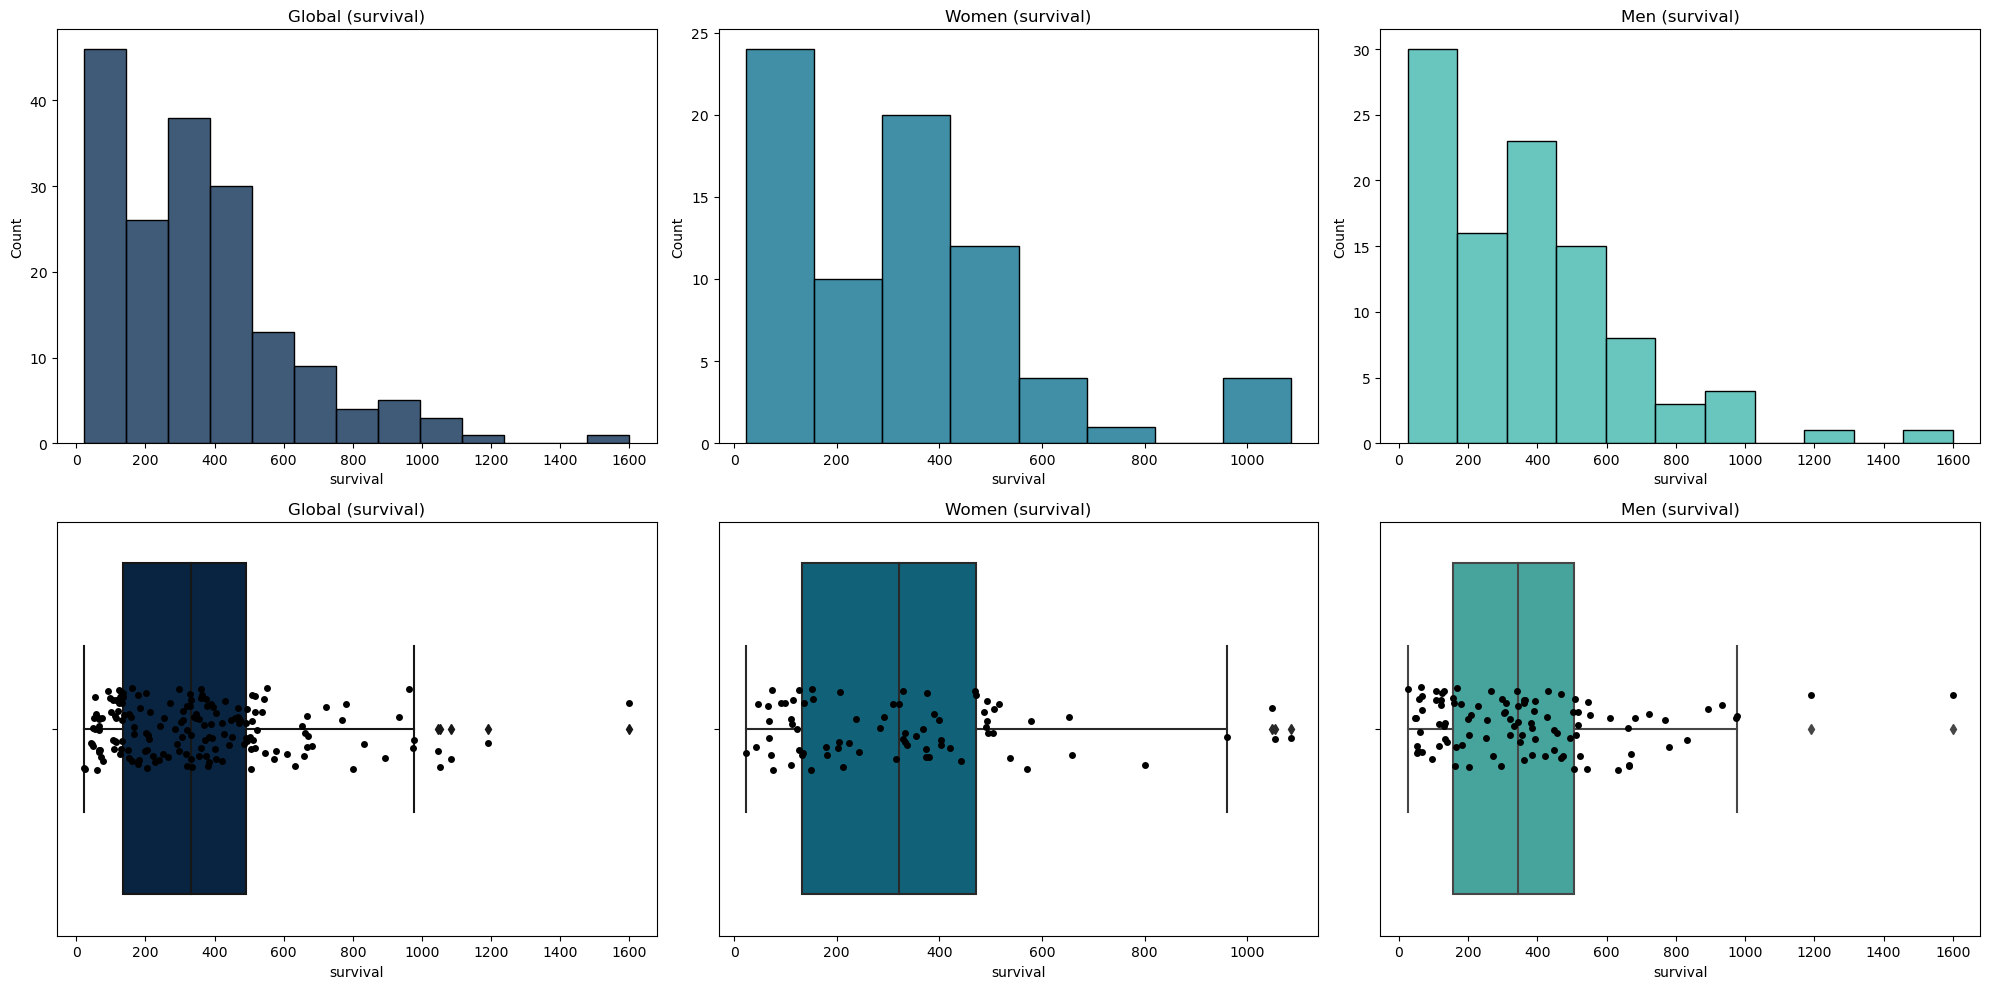

In [9]:
ExplorationDataPreliminaries_histplot_boxplot(df, 'survival')

ANOVA - Comparison of survival by surgery type:
F-statistic: nan
p-value: nan

Descriptive statistics:

Biopsy:
Number of patients: 70
Mean survival: 238.49
Standard deviation survival: 191.64

Incomplete:
Number of patients: 0
Mean survival: nan
Standard deviation survival: nan

Complete:
Number of patients: 0
Mean survival: nan
Standard deviation survival: nan


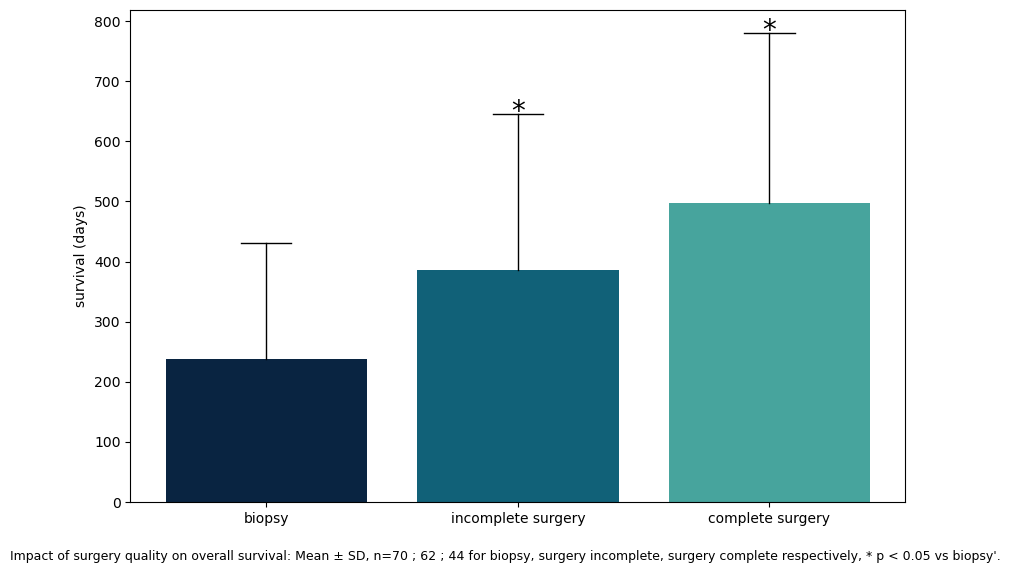

In [11]:
perform_anova_analysis(df, 'survival')

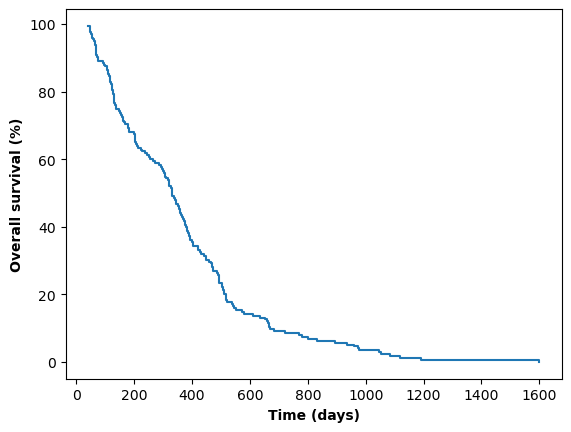

In [12]:
# Exemple de DataFrame avec une colonne 'survie' représentant le temps de survie de chaque individu
df = pd.read_csv('xxxx.csv', header=0, delimiter=';', decimal=',')

 
# Trier les temps de survie
df_sorted = df.sort_values('survival')
 
# Calculer la probabilité de survie empirique
n = len(df_sorted)
df_sorted['survie_pct'] = 100 * (1 - np.arange(1, n + 1) / n)
 
# Tracer la courbe de survie
plt.step(df_sorted['survival'], df_sorted['survie_pct'], where='post')
plt.xlabel("Time (days)", weight='bold')
plt.ylabel("Overall survival (%)", weight='bold')
plt.grid(color="white")
#plt.legend()
plt.savefig('survival_overall.png', bbox_inches='tight', dpi=150)
plt.show()

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
 
# Réaliser le test post-hoc de Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df['survival'], groups=df['surgery'], alpha=0.05)
print(tukey_result.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1              group2        meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------
  CompleteResection IncompleteResection   -92.382 0.1405 -207.0693   22.3053  False
  CompleteResection         NoResection -255.0958    0.0 -367.3424 -142.8493   True
IncompleteResection         NoResection -162.7139 0.0006 -264.5261  -60.9017   True
-----------------------------------------------------------------------------------
